<a href="https://colab.research.google.com/github/MegalaJ29/LGMVIP/blob/main/Task1_Iris_Flowers_Classification_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK-1**

**Iris Flowers Classification ML Project**

**ABOUT THE PROJECT**

Iris Flowers Classification — This particular Machine learning (ML) project is usually referred to as the “*Hello World*” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Iris Dataset — A multivariant dataset used for machine learning purposes. The following dataset contains a set of 150 records under five attributes sepal length sepal width petal length petal width species In this data set we analyze three species of Iris flower, i-e Iris setosa , Iris versicolor , and Iris verginica.

Data can be found at https://archive.ics.uci.edu/ml/datasets/iris


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('husl')
%matplotlib inline

import os
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Uploading required Iris.csv file

In [27]:
from google.colab import files
uploaded=files.upload()

Saving Iris1.csv to Iris1.csv


Loading the dataset

In [28]:
df = pd.read_csv('/content/Iris1.csv')
df.head()

,Id,Sepal Length cm,Sepal Width cm,Petal Length cm,Petal Width cm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
# Delete a Column
df = df.drop(columns = ['Id'])
df.head()

,Sepal Length cm,Sepal Width cm,Petal Length cm,Petal Width cm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
# To basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sepal Length cm  150 non-null    float64
 1   Sepal Width cm   150 non-null    float64
 2   Petal Length cm  150 non-null    float64
 3   Petal Width cm   150 non-null    float64
 4   Species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
# To display no. of samples on each class
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

Preprocessing the dataset

In [32]:
# Check for null values
df.isnull().sum()

Sepal Length cm    0
Sepal Width cm     0
Petal Length cm    0
Petal Width cm     0
Species            0
dtype: int64

In [33]:
# To display stats about data
df.describe()

,Sepal Length cm,Sepal Width cm,Petal Length cm,Petal Width cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
df.count()

Sepal Length cm    150
Sepal Width cm     150
Petal Length cm    150
Petal Width cm     150
Species            150
dtype: int64

Data Analysis

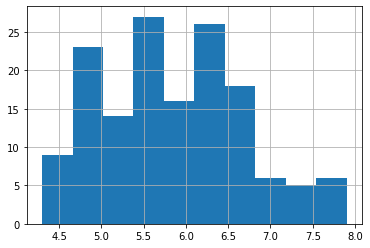

In [36]:
# Histograms
df['Sepal Length cm'].hist()

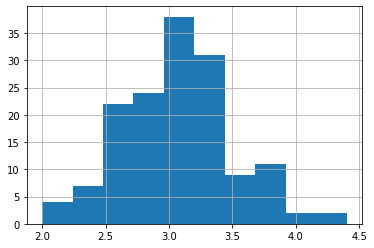

In [37]:
df['Sepal Width cm'].hist()

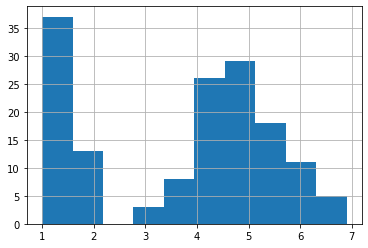

In [38]:
df['Petal Length cm'].hist()

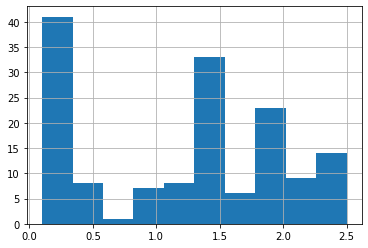

In [39]:
df['Petal Width cm'].hist()

**Matrix correlation of dataset**

A correlation matrix is a table which shows us the variables along with co-efficient. the individual cell in the table shows the correlation between two variables. values range ( -1 to 1 ). if two variables have high correlation , we can neglect one variable from those two.

In [40]:
df.corr()

,Sepal Length cm,Sepal Width cm,Petal Length cm,Petal Width cm
Sepal Length cm,1.000000,-0.109369,0.871754,0.817954
Sepal Width cm,-0.109369,1.000000,-0.420516,-0.356544
Petal Length cm,0.871754,-0.420516,1.000000,0.962757
Petal Width cm,0.817954,-0.356544,0.962757,1.000000


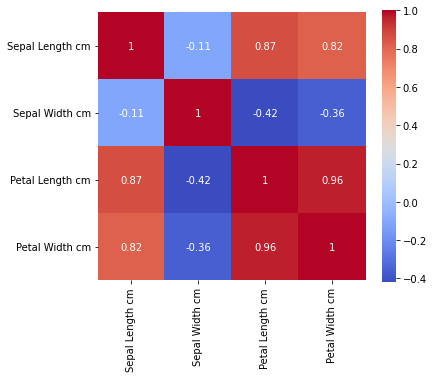

In [45]:
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(df.corr(), cbar=True, square=True, cmap='coolwarm',annot=True, ax=ax)

**Scatterplot**

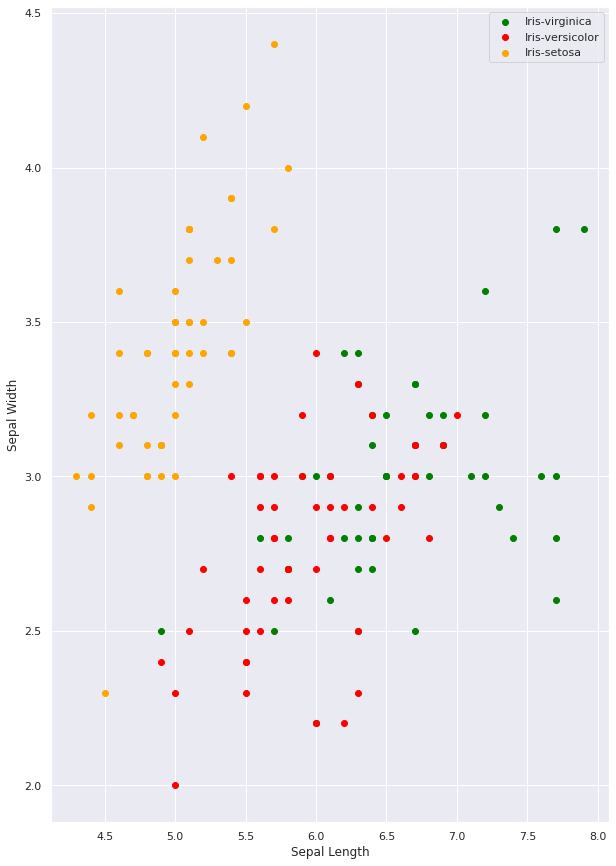

In [55]:
colors = ['green', 'red', 'orange']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['Sepal Length cm'], x['Sepal Width cm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

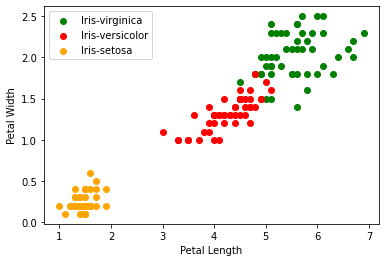

In [48]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['Petal Length cm'], x['Petal Width cm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

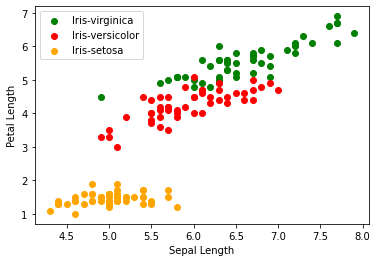

In [49]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['Sepal Length cm'], x['Petal Length cm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

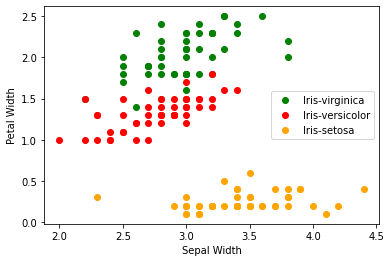

In [50]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['Sepal Width cm'], x['Petal Width cm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

 **Visual Analysis of Data**

**BOX PLOT**

Box plot is a percentile-based graph, which divides the data into four quartiles of 25% each. This method is used in statistical analysis to understand various measures such as mean, median and deviation.

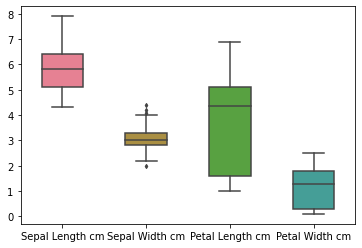

In [51]:
import seaborn as sns
sns.boxplot(data = df,width=0.5,fliersize=3)
sns.set(rc={'figure.figsize':(10,15)})

**SCATTER PLOT**

To understand how each feature accounts for classification of the data, we can build a scatter plot which shows us the correlation with respect to other features. This method helps just to figure out the important features which account the most for the classification in our model.

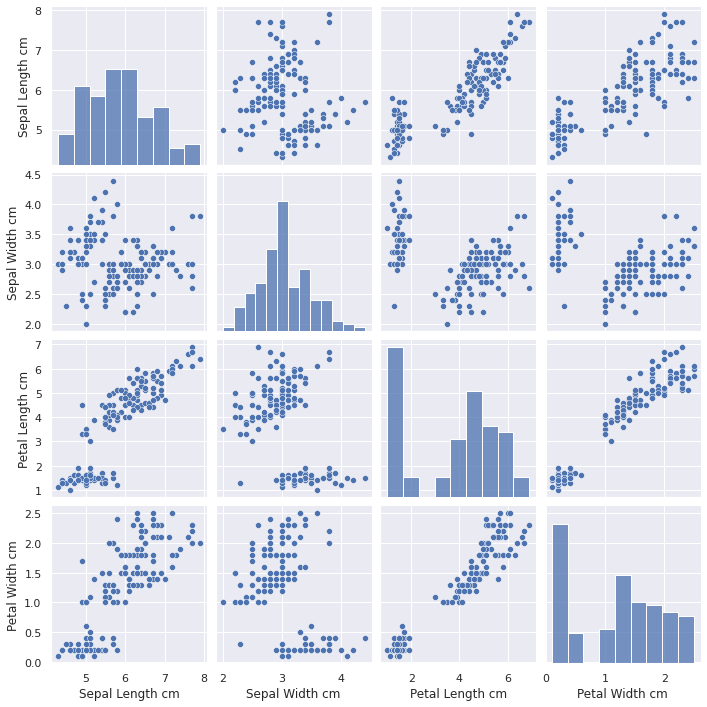

In [56]:
sp=sns.load_dataset("iris")
sns.pairplot(data = df)
plt.show()

**REGPLOT**

The regplot() function takes an argument logistic , which allows you to specify whether you wish to estimate the logistic regression model for the given data using true or false values. This will also produce the plot of the fit.

In [57]:
arr=sns.load_dataset("iris")

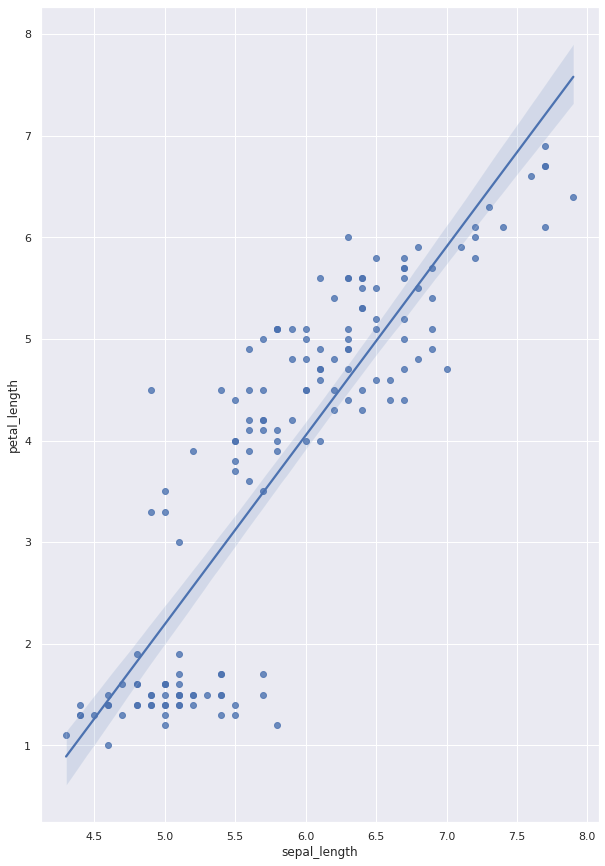

In [58]:
sns.regplot(x="sepal_length",y="petal_length",data=arr)

**CATPLOT**

The catplot function provides a new framework giving access to several types of plots that show relationship between numerical variable and one or more categorical variables, like boxplot, stripplot and so on. Catplot can handle 8 different plots currently available in seaborn.

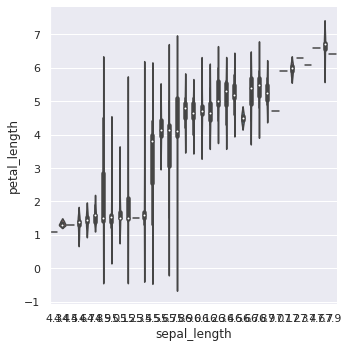

In [59]:
sns.catplot(x="sepal_length",y="petal_length",data=arr, kind="violin", split =True);

**DISTPLOT**

The seaborn. distplot() function is used to plot the distplot. The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.

In [61]:
temp=np.random.randn(150)

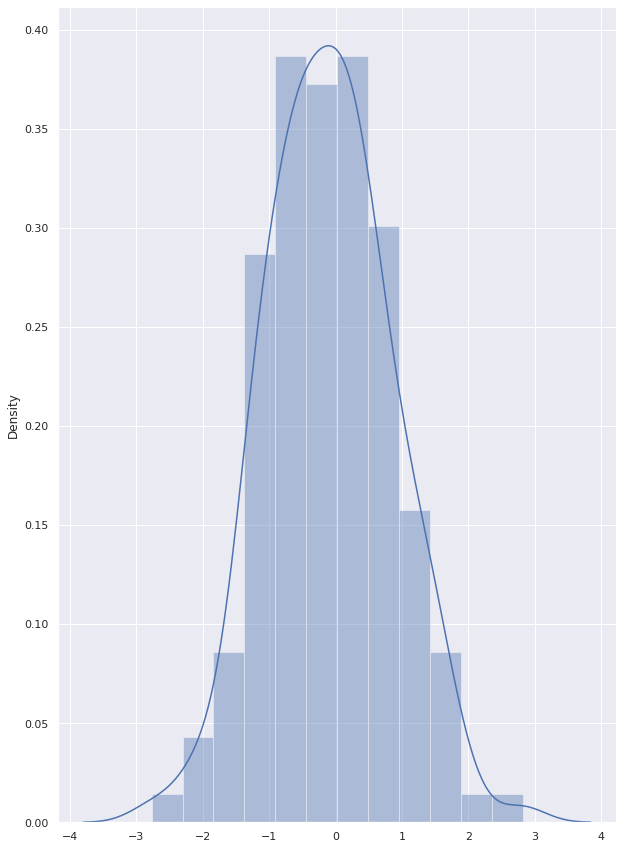

In [62]:
sns.distplot(temp)

We can assign name to axis and change colour

In [63]:
label_dist=pd.Series(temp,name="x")

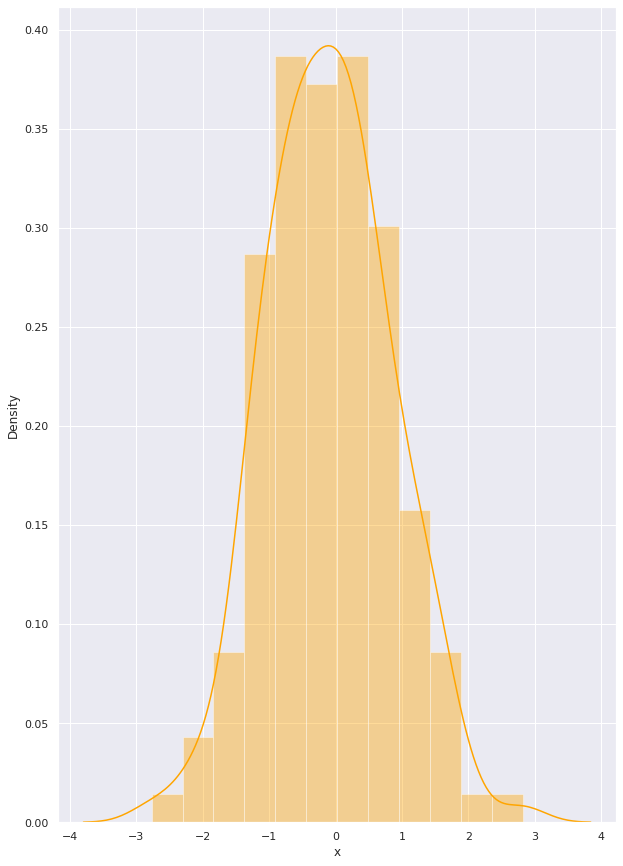

In [64]:
sns.distplot(label_dist,color="orange")

**Step Label encoding of dataset**

In machine learning , we usually deal with datasets which contain multiple labels in one or more than one columns. the process of label encoding is use to convert the labels into numeric form.

In [65]:
from sklearn.preprocessing import LabelEncoder
labE = LabelEncoder()

In [66]:
df['Species'] = labE.fit_transform(df['Species'])
df.head()

,Sepal Length cm,Sepal Width cm,Petal Length cm,Petal Width cm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Model training of dataset and accuracy checking**

Training dataset method is use to to train an algorithm or machine learning model to predict the outcome you design your model to predict. Test data is used to measure the performance, such as accuracy or efficiency, of the algorithm you are using to train the machine.

In [67]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [68]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [69]:
# model training
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [71]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [72]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [73]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [74]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [75]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [76]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


**Hence the Iris Flower classification ML project is completed**

# Task 1 completed